Generating a PFDHA model for the Ridgecrest, Landers, Hector Mine, and El Mayor Cucapah events based on displacement and fracture data from each event. The model uses the equation below, based on the displacement intensity and fracture density decays for each event (see the two MCMC scripts)

\begin{equation}
   P(S>S_{0}|x,M_{w}) =  e^{\frac{-S_{0}}{\beta}(\frac{x+x_d}{x_d})^{-n}} \nu_{o} (\frac{x+x_f}{x_f})^{-\gamma}
   \end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# load Landers data
best_fit_parameters_Landers_density = np.loadtxt('Landers_best_fit_parameters.txt', delimiter=' ')
Landers_g = best_fit_parameters_Landers_density[2]
Landers_d = best_fit_parameters_Landers_density[1]
Landers_vo = best_fit_parameters_Landers_density[0]
best_fit_parameters_Landers_displacement = np.loadtxt('Landers_best_fit_parameters_displacement.txt', delimiter=' ')
Landers_b = best_fit_parameters_Landers_displacement[0]
Landers_n = best_fit_parameters_Landers_displacement[1]

# load EMC data
best_fit_parameters_EMC_density = np.loadtxt('EMC_best_fit_parameters.txt', delimiter=' ')
EMC_g = best_fit_parameters_EMC_density[2]
EMC_d = best_fit_parameters_EMC_density[1]
EMC_vo = best_fit_parameters_EMC_density[0]
best_fit_parameters_EMC_displacement = np.loadtxt('EMC_best_fit_parameters_displacement.txt', delimiter=' ')
EMC_b = best_fit_parameters_EMC_displacement[0]
EMC_n = best_fit_parameters_EMC_displacement[1]


# load Hector Mine data
best_fit_parameters_HectorMine_density = np.loadtxt('HectorMine_best_fit_parameters.txt', delimiter=' ')
HectorMine_g = best_fit_parameters_HectorMine_density[2]
HectorMine_d = best_fit_parameters_HectorMine_density[1]
HectorMine_vo = best_fit_parameters_HectorMine_density[0]
best_fit_parameters_HectorMine_displacement = np.loadtxt('HectorMine_best_fit_parameters_displacement.txt', delimiter=' ')
HectorMine_b = best_fit_parameters_HectorMine_displacement[0]
HectorMine_n = best_fit_parameters_HectorMine_displacement[1]

# load Ridgecrest1 data
best_fit_parameters_Ridgecrest1_density = np.loadtxt('Ridgecrest1_best_fit_parameters.txt', delimiter=' ')
Ridgecrest1_g = best_fit_parameters_Ridgecrest1_density[2]
Ridgecrest1_d = best_fit_parameters_Ridgecrest1_density[1]
Ridgecrest1_vo = best_fit_parameters_Ridgecrest1_density[0]
best_fit_parameters_Ridgecrest1_displacement = np.loadtxt('Ridgecrest1_best_fit_parameters_displacement.txt', delimiter=' ')
Ridgecrest1_b = best_fit_parameters_Ridgecrest1_displacement[0]
Ridgecrest1_n = best_fit_parameters_Ridgecrest1_displacement[1]

# load Ridgecrest2 data 
best_fit_parameters_Ridgecrest2_density = np.loadtxt('Ridgecrest2_best_fit_parameters.txt', delimiter=' ')
Ridgecrest2_g = best_fit_parameters_Ridgecrest2_density[2]
Ridgecrest2_d = best_fit_parameters_Ridgecrest2_density[1]
Ridgecrest2_vo = best_fit_parameters_Ridgecrest2_density[0]
best_fit_parameters_Ridgecrest2_displacement = np.loadtxt('Ridgecrest2_best_fit_parameters_displacement.txt', delimiter=' ')
Ridgecrest2_b = best_fit_parameters_Ridgecrest2_displacement[0]
Ridgecrest2_n = best_fit_parameters_Ridgecrest2_displacement[1]

Define model

In [2]:
def PFDHAmodel(So,b,n,vo,d,g,axs,cinfo,labeli):
    x = np.linspace(1,10000,10000)
    PDmodel = np.exp((-So/b)*(x+1)**n)
    lambdamodel = vo * ((x+d)/d)**-g 
    PS_So= lambdamodel*PDmodel
    axs.plot(x,PS_So,c=cinfo,label=labeli)

Plot model for each event for various values of $S_0$

<Figure size 432x288 with 0 Axes>

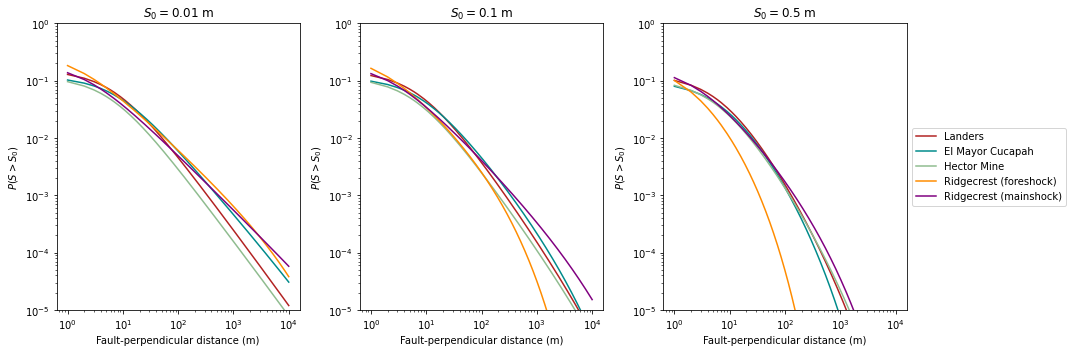

In [9]:
So = [0.01, 0.1, 0.5]

plt.figure()
fig, axis = plt.subplots(1,3, figsize=(15,5) ,tight_layout = True)
labels = ['Landers', 'El Mayor Cucapah',
          'Hector Mine', 'Ridgecrest (foreshock)', 'Ridgecrest (mainshock)']


for i in range(len(So)):
    PFDHAmodel(So[i],Landers_b,Landers_n,Landers_vo,Landers_d,Landers_g,axis[i],'firebrick',labels[0])
    PFDHAmodel(So[i],EMC_b,EMC_n,EMC_vo,EMC_d,EMC_g,axis[i],'darkcyan',labels[1])
    PFDHAmodel(So[i],HectorMine_b,HectorMine_n,HectorMine_vo,HectorMine_d,HectorMine_g,axis[i],'darkseagreen',labels[2])
    PFDHAmodel(So[i],Ridgecrest1_b,Ridgecrest1_n,Ridgecrest1_vo,Ridgecrest1_d,Ridgecrest1_g,axis[i],'darkorange',labels[3])
    PFDHAmodel(So[i],Ridgecrest2_b,Ridgecrest2_n,Ridgecrest2_vo,Ridgecrest2_d,Ridgecrest2_g,axis[i],'purple',labels[4])
    axis[i].set_xscale('log')
    axis[i].set_yscale('log')
    axis[i].set_ylabel('$P(S>S_{0}$)')
    axis[i].set_title('$S_0 = %s $ m' %So[i])
    axis[i].set_xlabel('Fault-perpendicular distance (m)')
    axis[i].set_ylim(10**-5,1)


# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('PFDHAmodel_perevent.pdf')
plt.show()
